<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 26: Interpreting Confidence

Associated Textbook Sections: [13.3, 13.4](https://ccsf-math-108.github.io/textbook/chapters/13/3/Confidence_Intervals.html)

## Outline

* [Bootstrap Confidence Intervals](#Bootstrap-Confidence-Intervals)
* [Visualizing Confidence](#Visualizing-Confidence)
* [Use Methods Appropriately](#Use-Methods-Appropriately)
* [Confidence Intervals For Testing](#Confidence-Intervals-For-Testing)

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Bootstrap Confidence Intervals

---

### Bootstrap the Distribution of a Statistic

Simulation method to estimate the sample distribution of your statistic.

<img src="./bootstrap_from_pop.png" alt="Creating bootstrap resamples from a random sample from a population." width=60%>

<img src="./distribution_from_resamples.png" alt="Creating a sampling distribution and confidence interval from the resampled statistics." width=60%>

---

### A Bootstrap Confidence Interval

Construct a 95% confidence interval by taking the 2.5% and (100 - 2.5)% percentiles:

<img src="./95_ci.png" alt="A 95% C.I. formed from the distribution of resampled statistics." width=40%>

---

### The Bootstrap in Words

* From the original sample,
    * draw at random
    * **with replacement**
        * Otherwise you would always get the same sample
    * **Use the same sample size** as the original sample
        * The size of the new sample has to be the same as the original one, so that estimates are comparable
* For each sample, **compute the statistic**
* Compute **empirical distribution of the statistics**


---

## Visualizing Confidence

---

### 95% Confidence Interval

* Interval of estimates of a parameter
* Based on random sampling
* 95% is called the confidence level
    * Could be any percent between 0 and 100
    * Higher level means wider intervals
* A "good" interval is one that contains the parameter
* The confidence is in the process that creates the interval:
    * It generates a "good" interval about 95% of the time.


---

### The Meaning of 95% Confidence

> The confidence is in the process that gives the interval: It generates a "good" interval about 95% of the time.

<img src="./visualizing_confidence.png" width=30%>

* Each yellow line in the visual represents a confidence interval from a fresh sample from the population.
* The red line marks the parameter being estimated by the intervals.
* Approximately 95% of the yellow lines intersect the red line.

---

### Visualizing Confidence

A similar/interactive tool to help visualize the meaning of a confidence interval: [Interpreting Confidence Intervals](https://rpsychologist.com/d3/ci/)

* _The Greek letter $\mu$ is used to symbolize the parameter._
* In our class, the sampling distribution comes from the statistics we calculate using bootstrap resamples.

In [ ]:
%%html
<iframe src="https://rpsychologist.com/d3/ci#settings" width="800" height="600"></iframe>

---

## Use Methods Appropriately

---

### When Not to Use Our Bootstrap Method

* If you're trying to estimate any parameter that's greatly affected by rare elements of the population
very high or very low percentiles, or min and max
* If the probability distribution of your statistic is not roughly bell-shaped (the shape of the empirical distribution will be a clue)
* If the original sample is very small

---

### Demo: Create a Confidence Interval for Unknown Population Mean

* Load the `baby.csv` data from the Kaiser-supported study on the relationship between smoking during pregnancy and low-weight births.
* Visualize the distribution of maternal ages.
* Compute the mean age of mothers in the sample.

In [ ]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


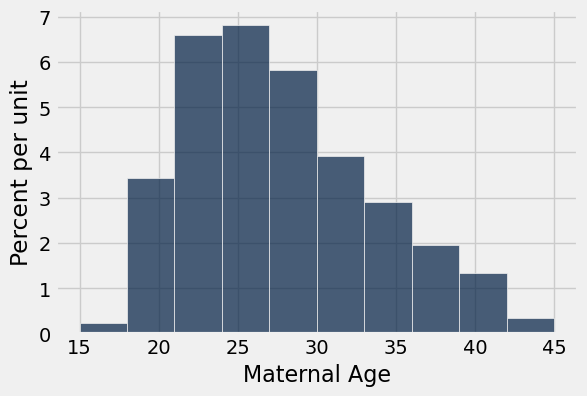

In [ ]:
births.hist('Maternal Age')

In [ ]:
np.mean(births.column('Maternal Age'))

27.228279386712096

---

**Question**: What is the mean age of the mothers in the population?

In [ ]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.mean(resample.column('Maternal Age'))

In [ ]:
num_repetitions = 3_000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [ ]:
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([ 26.89863714,  27.55706985])

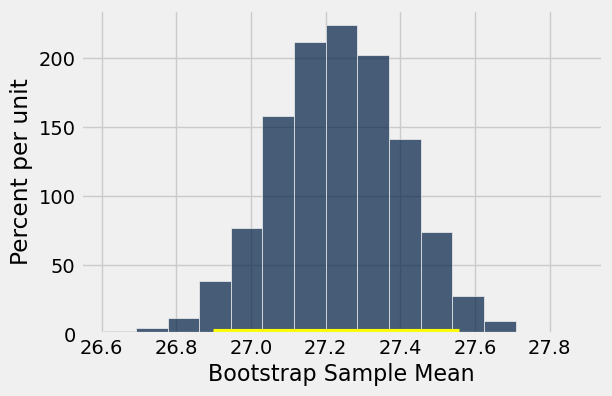

We are 95% confident that the mean age of the mothers in the population is between 26.898637137989777 and 27.557069846678022 years old.


In [ ]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plt.plot([left, right], [0, 0], color='yellow', lw=8)
plt.show()
print(f"We are 95% confident that the mean age of the mothers in the population is between {left} and {right} years old.")

---

### An Incorrect Use

#### Confidence Interval
By our calculation, an approximate 95% confidence interval for the average age of the mothers in the population is (26.9, 27.6) years.

#### Incorrect Statement
About 95% of the mothers in the population were between 26.9 years and 27.6 years old.

#### Reasoning
We're estimating that their average age is in this interval.

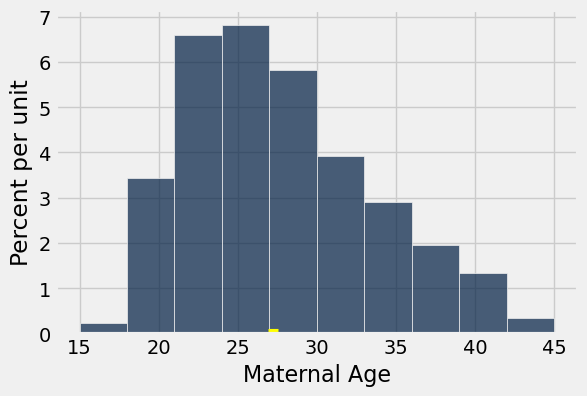

In [ ]:
births.hist('Maternal Age')
plt.plot([left, right], [0, 0], color='yellow', lw=8);

---

### An Incorrect Interpretation

#### Confidence Interval
An approximate 95% confidence interval for the average age of the mothers in the population is (26.9, 27.6) years.

#### Incorrect Statement
There is a 0.95 probability that the average age of mothers in the population is in the range 26.9 to 27.6 years.

#### Reasoning
The parameter is fixed, and the interval (26.9, 27.6) is fixed. The parameter is either in that interval or not. Once you've picked an interval, there's no probability involved.

---

### A Correct Interpretation

#### Confidence Interval
An approximate 95% confidence interval for the average age of the mothers in the population is (26.9, 27.6) years.

#### Correct Statement
If we generated confidence intervals in the same way many times, then approximately 95% of the intervals would contain the true average age of mothers in the population.

---

### Another Correct Interpretation

#### Confidence Interval
An approximate 95% confidence interval for the average age of the mothers in the population is (26.9, 27.6) years.

#### Correct Statement
There is a 95% chance the 95% confidence interval calculated from a given **future** sample will contain the average age of the mothers in the population.

---

### 95% Confidence

* Interval of estimates of a parameter
* Based on random sampling
* The process results in a random interval
* A "good" interval is one that contains the parameter
* The confidence is in the process that creates the interval: It generates a "good" interval (approximately) 95% of the time.


---

## Confidence Intervals For Testing

---

### Using a CI for Testing

* Null hypothesis: $\text{Population mean} = x$
* Alternative hypothesis: $\text{Population mean} \neq x$
* Cutoff for p-value: p%
* Method:
    * Construct a (100-p)% confidence interval for the population mean
    * Make a decision:
        * If x is not in the interval, reject the null
        * If x is in the interval, can't reject the null


---

### Using the Confidence Interval for Testing Hypotheses

* **Null Hypothesis:** The mean age of mothers in the population is 25 years; the random sample average is different due to chance.
* **Alternative Hypothesis:** The mean age of the mothers in the population is not 25 years.
* **Cutoff**: Suppose you use the 5% cutoff for the p-value.

Since 25 is not in the constructed 95% confidence interval estimate for the mean age (26.9, 27.6), then reject the null hypothesis.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>